In [1]:
# Importando bibliotecas
import sys
#print("Current version of Python is ", sys.version)
import requests
from requests.auth import HTTPBasicAuth
import json
import pandas as pd
import numpy as np
from datetime import datetime as date
import datetime
import quantstats as qs
#import sqlalchemy
#from sqlalchemy import create_engine
#from sqlalchemy import update
import timeit
import time
import string
#import pygsheets
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set_theme()
from urllib.request import urlretrieve



from warnings import warn
import pandas as pd
import numpy as np
from math import ceil as _ceil, sqrt as _sqrt
from scipy.stats import (
    norm as _norm, linregress as _linregress
)

from quantstats import utils as _utils
from quantstats import plots as _plots

from quantstats._plotting import core as _core
from quantstats._plotting import wrappers as _wrappers
from matplotlib.ticker import FuncFormatter, FormatStrFormatter
import matplotlib.dates as _mdates


from datetime import date
import datetime
from pandas.tseries.offsets import BDay
pd.set_option("display.max_colwidth", 150)

#Gráficos
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import yfinance as yf
#from IPython.display import display

import calendar


#from datetime import datetime
from datetime import timezone
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders


%matplotlib inline

pd.options.plotting.backend = 'plotly'


from Utils import *


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd


In [2]:
hoje = datetime.date.today()

In [3]:
#consulta IPCA
ipca = consulta_bc(433)
ipca.plot()

In [4]:
#IPCA acum 12 meses
ipca_12m = consulta_bc(433)
ipca_12m['Valor_Multiplicado'] = ((1+ipca_12m['valor']/100).rolling(12).apply(lambda x: x.prod(), raw=True)-1)*100
ipca_12m['Valor_Multiplicado'] = ipca_12m['Valor_Multiplicado'].round(2)
ipca_12m.loc['2019-01-02':hoje]['Valor_Multiplicado'].plot()



In [5]:
#Consulta IGPM
igpm = consulta_bc(189)
igpm.plot()

In [6]:
#Consulta Selic Meta
selic_meta = consulta_bc(432)
selic_meta.plot()

Fundos

In [7]:
#Inputs
data_inicio = '2022-10'
data_fim = hoje.strftime('%Y-%m')

In [8]:
cadastro = busca_cadastro_cvm()

c:\Users\gahbr\dev\Github\Publico\Utils.py:91: DtypeWarning:

Columns (14,17,18,20,22,24,27,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
cadastro['CLASSE'].unique()

array([nan, 'Fundo Multimercado', 'Fundo de Curto Prazo',
       'Fundo de Ações', 'Fundo de Renda Fixa', 'Fundo Cambial',
       'Fundo Referenciado', 'Fundo da Dívida Externa', 'FMP-FGTS',
       'FIC FIDC', 'FIDC', 'FIDC-NP', 'FIDC-PIPS', 'FICFIDC-NP',
       'FIP Multi', 'FIDCFIAGRO', 'FII', 'FII-FIAGRO', 'FIP', 'FIP EE',
       'FIC FIP', 'FIP CS', 'FIP IE', 'FIP PD&I', 'FIP-FIAGRO', 'FMIEE',
       'FUNCINE'], dtype=object)

In [10]:
informes = busca_informes_diarios_cvm_por_periodo(data_inicio=data_inicio, data_fim=data_fim)
informes

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2022-10-03,1079578.99,30.142966,1084071.01,0.0,0.0,1
1,FI,00.017.024/0001-53,2022-10-04,1080133.56,30.155160,1084509.54,0.0,0.0,1
2,FI,00.017.024/0001-53,2022-10-05,1080687.71,30.167399,1084949.71,0.0,0.0,1
3,FI,00.017.024/0001-53,2022-10-06,1081241.21,30.179627,1085389.50,0.0,0.0,1
4,FI,00.017.024/0001-53,2022-10-07,1078673.85,30.191836,1082785.38,0.0,3043.2,1
...,...,...,...,...,...,...,...,...,...
3664484,FI,97.929.213/0001-34,2023-05-03,80330493.70,10.569549,80321399.54,0.0,0.0,2
3664485,FI,97.929.213/0001-34,2023-05-04,76499033.25,10.584651,80436164.06,0.0,0.0,2
3664486,FI,97.929.213/0001-34,2023-05-05,80648411.62,10.611294,80638631.00,0.0,0.0,2
3664487,FI,97.929.213/0001-34,2023-05-08,80720231.49,10.621029,80712609.15,0.0,0.0,2


In [11]:
#Axiom Infinity
cpnj_axiom_infinity = '46.649.069/0001-41'
den_social_axiom_infinity = 'AXIOM INFINITY FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO'

infinity_fund = consulta_fundo(informes, cpnj_axiom_infinity)
infinity_fund['cotas_normalizadas'].plot()

In [12]:
fim = hoje.strftime('%Y-%m-%d')
data_inicio = pd.Timestamp('2022-10-01 10:00:00')
data_fim = pd.Timestamp(fim+' 10:00:00')
data_fim

Timestamp('2023-05-11 10:00:00')

In [13]:
try:
    cpnj_axiom_infinity = '46.649.069/0001-41'
    infinity_ret = ret[cpnj_axiom_infinity]
    cotas_norm = cotas_norma_clean[cpnj_axiom_infinity]

    ret_ano_infinity = cagr(infinity_ret, rf=0, nperiods=0) *100
    vol_ano_infinity = qs.stats.volatility(infinity_ret, annualize=True, prepare_returns=False) *100
    excess_ret = cagr(infinity_ret, rf=0.1350, nperiods=252) *100
    es = cvar(infinity_ret, confidence=0.95, prepare_returns=False)
    ret_mês_infinity = (ret_ano_infinity/100+1)**(1/12)-1
    sharpe = (excess_ret/vol_ano_infinity)

    infinity_ret_total = (cotas_norm[-1] -1)*100

    print(f"infinity_ret_per {infinity_ret_total/100: .2%}")
    print(f"ret_ano_infinity {ret_ano_infinity/100: .2%}")
    print(f"ret_mês_infinity {ret_mês_infinity: .2%}")
    print(f"vol_ano_infinity {vol_ano_infinity/100: .2%}")
    print(f"excess_ret {excess_ret/100: .2%}")
    print(f"sharpe {sharpe: .4}")
    print(f"es {es: .2%}")
except:
    pass

In [14]:
fundos = ranking_fundos(informes, cadastro, minimo_de_cotistas=10, classe='Fundo Multimercado')

In [15]:
cpnj_axiom_infinity = '46.649.069/0001-41'

year=hoje.year
month_start=1
month_end=int(hoje.strftime('%m'))-1
data_inicio, data_fim = set_date(year, month_start, month_end)

fundos_rk = df_metrics(informes, cadastro, data_inicio, data_fim, classe='Fundo Multimercado')
fundos_rk = fundos_rk[fundos_rk.PL > 0]
df_clean = fundos_rk[(fundos_rk.CAGR > fundos_rk.CAGR.quantile(0.05)) & (fundos_rk.CAGR < fundos_rk.CAGR.quantile(0.95))]
infinity_ret_total = df_clean[df_clean.index == cpnj_axiom_infinity].Ret_Acum_Per[0]
cdi_ret_total, ibov_ret_total, vol_ano_ibov, ret_ano_ibov = get_ret_cdi_ibov(data_inicio, data_fim)

fig_1 = px.histogram(x=df_clean['Ret_Acum_Per'], title=f"Histograma - Retorno dos Fundos ({data_inicio} a {data_fim})", nbins=100, labels = dict(x="Ret_Acum_Per", y="count"), template= 'plotly_white')
fig_1.add_vline(ibov_ret_total, line_color='red', annotation_text=f"IBOV({ibov_ret_total:.2}%)", annotation_font_size=16)
fig_1.add_vline(cdi_ret_total, line_color='blue', annotation_text=f"CDI({cdi_ret_total:.2}%)", annotation_font_size=16, annotation_y=0.75)
fig_1.add_vline(infinity_ret_total, line_color='black', annotation_text=f"INFINITY({infinity_ret_total:.2}%)", annotation_font_size=16)
fig_1.update_layout(bargap=0.01, showlegend=False)
#fig_1.update_layout(height=400, width=800)

#df_clean_cagr = df_clean_cagr[(df_clean_cagr.CAGR < df_clean_cagr.CAGR.quantile(0.80))]
df_clean = df_clean[(df_clean.Ret_Acum_Per > df_clean.Ret_Acum_Per.quantile(0.05)) & (df_clean.Ret_Acum_Per < df_clean.Ret_Acum_Per.quantile(0.9))]
df_clean_final = df_clean[(df_clean.Sharpe > df_clean.Sharpe.quantile(0.1)) & (df_clean.Sharpe < df_clean.Sharpe.quantile(0.90))]

#display(df_clean_final)
linha_infinity = df_clean_final.loc[df_clean_final.index == cpnj_axiom_infinity]
#print(linha_infinity.iloc[0,0], linha_infinity.iloc[0,2])

#so para o plot
df_clean_final2 = df_clean_final[(df_clean_final.Vol < 20)]


fig_2 = px.scatter(data_frame=df_clean_final2,
                y="Ret_Acum_Per",
                x="Vol",
                color="Sharpe", template= 'plotly_white',
                hover_name=df_clean_final2['Fundo de Investimento']
)

#fig_2.update_layout(height=500, width=800)


try:
    fig_2.add_scatter(y=[linha_infinity.iloc[0,0]], #ret_ano_infinity
                    x=[linha_infinity.iloc[0,2]],
                    text=['INFINITY_FUND'],
                    mode='markers+text', name='INFINITY_FUND', marker=dict(size=20, color = 'black', layer = 'below'))
    print('hi')
except:
    pass

fig_2.add_scatter(x=[vol_ano_ibov], y=[ret_ano_ibov], line_color='black', showlegend=True, name='IBOV')
fig_2.add_vline(vol_ano_ibov, line_color='black')
fig_2.add_hline(ret_ano_ibov, line_color='black')

vol_inf = linha_infinity.iloc[0,2]
ret_inf = linha_infinity.iloc[0,0]

fig_2.add_scatter(x=[vol_inf], y=[ret_inf], line_color='blue', showlegend=True, name='Infinity')
fig_2.add_vline(vol_inf, line_color='blue')
fig_2.add_hline(ret_inf, line_color='blue')

fig_2.update_layout(
    legend=dict(
        yanchor="bottom",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

display(fig_1,fig_2)


[*********************100%***********************]  1 of 1 completed


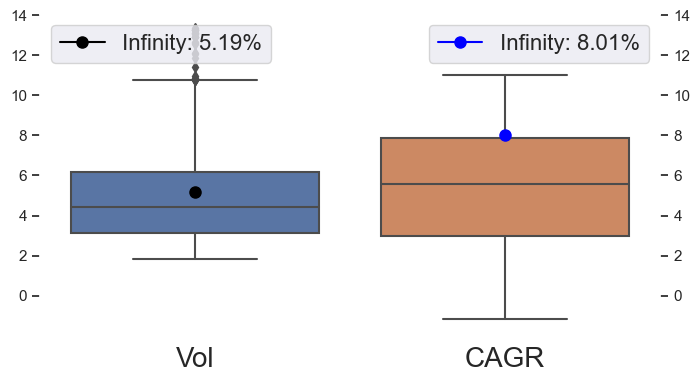

In [16]:
plot = linha_infinity[['Ret_Acum_Per', 'CAGR', 'Vol', 'Sharpe']]
plot.reset_index(inplace=True)


idx = ['Vol', 'CAGR']
df = df_clean_final[idx]
df = df[(df.Vol > df.Vol.quantile(0.1)) & (df.Vol < df.Vol.quantile(0.90))]
df = df[(df.CAGR > df.CAGR.quantile(0.1)) & (df.CAGR < df.CAGR.quantile(0.90))]



# criando uma nova figura
fig = plt.figure()

fig.subplots_adjust(top=0.9, bottom=0.1)

fig.set_size_inches(8, 4)

# adicionando um subplot à figura
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df)
ax.set_ylabel(None)
ax.set_title(None)



ax.plot(0, plot.loc[0,'Vol'], marker='o', markersize=8, color='black', label=f"Infinity: {plot.loc[0,'Vol']:.2f}%")
ax.legend()
ax.tick_params(axis='x', which='major', labelsize=20)

# cria novo eixo y secundário
ax2 = ax.twinx()

# plota os dados de CAGR no novo eixo
ax2.plot(1, plot.loc[0,'CAGR'], marker='o', markersize=8, color='blue', label=f"Infinity: {plot.loc[0,'CAGR']:.2f}%")

# configura a escala do eixo y secundário
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel(None)
ax.legend(loc='upper left', fontsize = 16)
ax2.legend(loc='upper right', fontsize = 16)
ax2.tick_params(axis='x', which='major', labelsize=20)

# removendo os eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('None')
ax.grid(False) # Remove o grid
ax2.grid(False) # Remove o grid

caminho_pasta = 'imagens'
nome_arquivo = '/boxplot_vol_cagr.png'
fig.savefig(caminho_pasta+nome_arquivo)


# exibindo o gráfico
plt.show()


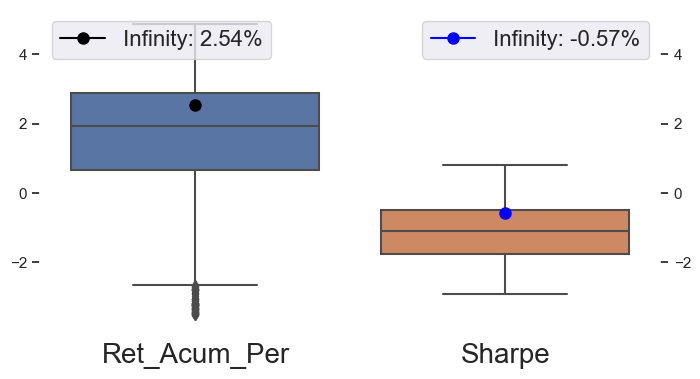

In [17]:
idx = ['Ret_Acum_Per', 'Sharpe']
df = df_clean_final[idx]


# criando uma nova figura
fig = plt.figure()

fig.subplots_adjust(top=0.9, bottom=0.1)

fig.set_size_inches(8, 4)



# adicionando um subplot à figura
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=df)
ax.set_ylabel(None)
ax.set_title(None)
ax.tick_params(axis='x', which='major', labelsize=20)


ax.plot(0, plot.loc[0,'Ret_Acum_Per'], marker='o', markersize=8, color='black', label=f"Infinity: {plot.loc[0,'Ret_Acum_Per']:.2f}%")
ax.legend()

# cria novo eixo y secundário
ax2 = ax.twinx()

# plota os dados de CAGR no novo eixo
ax2.plot(1, plot.loc[0,'Sharpe'], marker='o', markersize=8, color='blue', label=f"Infinity: {plot.loc[0,'Sharpe']:.2f}%")
ax2.tick_params(axis='x', which='major', labelsize=20)
# configura a escala do eixo y secundário
ax2.set_ylim(ax.get_ylim())
ax2.set_ylabel(None)
ax.legend(loc='upper left', fontsize = 16)
ax2.legend(loc='upper right', fontsize = 16)


# removendo os eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('None')

ax.grid(False) # Remove o grid
ax2.grid(False) # Remove o grid

caminho_pasta = 'imagens'
nome_arquivo = '/boxplot_ret_sharpe.png'
fig.savefig(caminho_pasta+nome_arquivo)


# exibindo o gráfico
plt.show()



In [18]:
import os

caminho_pasta = 'imagens'
nome_arquivo = 'Dispersão_de_retorno .png'

if not os.path.exists(caminho_pasta):
    os.makedirs(caminho_pasta)

caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)

df_clean_final2 = df_clean_final[(df_clean_final.Vol < 20)]

fig2 = px.scatter(data_frame=df_clean_final2,
                y="Ret_Acum_Per",
                x="Vol",
                color="Sharpe", template= 'plotly_white',
                hover_name=df_clean_final2['Fundo de Investimento']
)

fig2.add_scatter(x=[vol_ano_ibov], y=[ret_ano_ibov], line_color='black', showlegend=True, name='IBOV')
fig2.add_vline(vol_ano_ibov, line_color='black')
fig2.add_hline(ret_ano_ibov, line_color='black')

vol_inf = linha_infinity.iloc[0,2]
ret_inf = linha_infinity.iloc[0,0]

fig2.add_scatter(x=[vol_inf], y=[ret_inf], line_color='blue', showlegend=True, name='Infinity')
fig2.add_vline(vol_inf, line_color='blue')
fig2.add_hline(ret_inf, line_color='blue')

fig2.update_layout(
    legend=dict(
        yanchor="bottom",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig2.update_xaxes(title = 'Vol')
fig2.update_layout(width=800, height=400)
fig2.update_layout(legend_font_size=20)
fig2.update_layout(xaxis_title_font_size=30)
fig2.update_layout(yaxis_title_font_size=30)
fig2.update_layout(legend_title_text="")
fig2.write_image(caminho_arquivo)

nome_arquivo2 = 'Histograma_de_retorno .png'
caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo2)
fig_1 = px.histogram(x=df_clean['Ret_Acum_Per'], nbins=100, labels = dict(x="Ret_Acum_Per", y="count"), template= 'plotly_white')
fig_1.add_vline(ibov_ret_total, line_color='red', annotation_text=f"IBOV({ibov_ret_total:.2}%)", annotation_font_size=16)
fig_1.add_vline(cdi_ret_total, line_color='blue', annotation_text=f"CDI({cdi_ret_total:.2}%)", annotation_font_size=16, annotation_y=0.75)
fig_1.add_vline(infinity_ret_total, line_color='black', annotation_text=f"INFINITY({infinity_ret_total:.2}%)", annotation_font_size=16)
fig_1.update_layout(bargap=0.01, showlegend=False)

fig_1.update_xaxes(title = 'Retorno Acumulado Perc.')
fig_1.update_layout(width=1200, height=500)
fig_1.update_layout(legend_font_size=20)
fig_1.update_yaxes(title = None)
fig_1.update_layout(xaxis_title_font_size=30)
fig_1.update_layout(yaxis_title_font_size=30)
fig_1.update_layout(legend_title_text="")


fig_1.write_image(caminho_arquivo)

In [19]:
infinity_describe = []
indices = [0,1,2,4,6]
for i in indices:
    infinity_describe.append(linha_infinity.iloc[0,i])

x = df_clean.describe()
x = x[['Ret_Acum_Per', 'CAGR', 'Vol', 'Sharpe', 'Max_DD']]
x = x.rename(columns={'Ret_Acum_Per':'Ret Acum.',})
x_transposto = x.transpose()
x_transposto = x_transposto[['mean', '25%', '50%', '75%']]
x_transposto = x_transposto.rename(columns={'mean':'Media'})
x_transposto['Infinity'] = infinity_describe
x_transposto = x_transposto.applymap(lambda x: '{:.2f}'.format(x))
#x_transposto = x_transposto.astype(float)

caminho_pasta_tabelas = 'tabelas/'
x_transposto.to_excel(caminho_pasta_tabelas+'benchmark_fundos.xlsx')

In [20]:
df_cdi = cdi_acumulado('2022-10-01', hoje.strftime('%Y-%m-%d'))*100
df_cdi=df_cdi.rename(columns={'valor':'CDI'})
df_ibov = yf.download('^BVSP', start='2022-10-01', end='2023-04-27')['Adj Close']
df_ibov = (df_ibov/df_ibov.iloc[0])*100
df_ibov.index = pd.to_datetime(df_ibov.index).strftime('%Y-%m-%d')
df_cdi.index = pd.to_datetime(df_cdi.index).strftime('%Y-%m-%d')
#display(df_ibov)
#display(df_cdi)


[*********************100%***********************]  1 of 1 completed


In [21]:
informes = busca_informes_diarios_cvm_por_periodo(data_inicio='2022-10-01', data_fim=hoje.strftime('%Y-%m-%d'))
df_infinity = consulta_fundo(informes, cpnj_axiom_infinity)['cotas_normalizadas']
#df_infinity = df_infinity.rename(columns={None:'Infinity'})
#df_infinity


In [22]:
dd = pd.concat([df_cdi, df_ibov, df_infinity], axis=1)
dd = dd.rename(columns={'cotas_normalizadas':'Infinity', 
                        'Adj Close': 'Ibovespa'})
dd = dd.dropna()
dd

,CDI,Ibovespa,Infinity
2022-10-03,100.000000,100.000000,100.000000
2022-10-04,100.101602,100.082663,100.060988
2022-10-05,100.152441,100.916183,100.109244
2022-10-06,100.203307,101.228753,100.152723
2022-10-07,100.254198,100.207519,100.182735
...,...,...,...
2023-04-19,107.203842,89.476811,103.453077
2023-04-20,107.258288,89.867739,103.680558
2023-04-24,107.312763,89.506088,103.528771
2023-04-25,107.367265,88.880087,103.442559


In [23]:
fig = px.line(data_frame=dd, template='plotly_white')
fig.update_xaxes(title = None)
fig.show()

In [24]:
import os

caminho_pasta = 'imagens'
nome_arquivo = 'infinity_cdi_ibov.png'

if not os.path.exists(caminho_pasta):
    os.makedirs(caminho_pasta)

caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)

fig = px.line(data_frame=dd, template='plotly_white')

fig.update_layout(
    width=1400,
    height=400,
    legend_font_size=20,
    yaxis_title_font_size=30,
    xaxis_title=None,
    yaxis_title=None,
    legend_title_text="",
    legend_orientation="h",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
)
fig.write_image(caminho_arquivo)

In [25]:
codigo_bcb = 12
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)

cdi = pd.read_json(url)
cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
cdi.set_index('data', inplace=True)
cdi_ts = cdi[data_inicio : data_fim]/100
cdi_acum = (1 + cdi_ts).cumprod()
cdi_ret_total = (cdi_acum.iloc[-1][0]-1)*100


ibov = yf.download('^BVSP', start=data_inicio, end=data_fim)['Adj Close']
ibov = (ibov / ibov.iloc[0])*100
ibov_ret = ibov.pct_change()
ret_ano_ibov = cagr(ibov_ret, rf=0, nperiods=0) * 100
vol_ano_ibov = qs.stats.volatility(ibov_ret, prepare_returns=False) * 100
ibov_ret_total = (ibov[-1]/100 -1)*100

cdi_ts = (1 + cdi_ts).cumprod()
cdi_ts.reset_index(inplace=True)
cdi_ts = cdi_ts.rename(columns={'data': 'Date', 'valor': 'CDI'})
cdi_ts['Date'] = pd.to_datetime(cdi_ts['Date'])
cdi_ts.set_index(['Date'], inplace=True)

ibov = pd.DataFrame(ibov)
ibov.reset_index(inplace=True)
ibov = ibov.rename(columns={'Date': 'Date', 'Adj Close': 'IBOV'})
ibov['Date'] = pd.to_datetime(ibov['Date'])
ibov.set_index(['Date'], inplace=True)
ibov.index = ibov.index.strftime('%Y-%m-%d')
ibov.index = pd.to_datetime(ibov.index)

[*********************100%***********************]  1 of 1 completed


In [26]:
def busca(ticker):
    interval='d'
    url = f'https://stooq.com/q/d/l/?s={ticker}&i={interval}'
    
    df_teste = pd.read_csv(url, index_col=0, parse_dates=True)
    return df_teste

In [27]:
#Cotacoes

df1 = busca("^SPX") #SP500
df2 = busca("VI.C") #S&P500 VIX Cash
df3 = busca("^NDQ") #Nasdaq
df4 = busca("^BVP") #Ibovespa
df5 = busca("^HSI") #Hang Seng Index - Hong Kong (^HSI)
df6 = busca("^CRY") #CRB Commodity Index (^CRY)
df7 = busca("usdbrl") #U.S. Dollar / Brazilian Real (USDBRL)




In [28]:
dfs = [df1, df2, df3, df4, df5, df6, df7]

merged = dfs[0]
for df in dfs[1:]:
    merged = pd.merge(merged, df, on='Date', how='inner')
merged
datas = merged.index.tolist()
datas = [dt.strftime('%Y-%m-%d') for dt in datas]
#datas

C:\Users\gahbr\AppData\Local\Temp\ipykernel_15324\848766522.py:5: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'High_x', 'Open_x', 'Close_x', 'Low_x'} in the result is deprecated and will raise a MergeError in a future version.

C:\Users\gahbr\AppData\Local\Temp\ipykernel_15324\848766522.py:5: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Volume_x'} in the result is deprecated and will raise a MergeError in a future version.

C:\Users\gahbr\AppData\Local\Temp\ipykernel_15324\848766522.py:5: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'High_x', 'Open_x', 'Close_x', 'Low_x'} in the result is deprecated and will raise a MergeError in a future version.



In [29]:
# Data de hoje
hoje = date.today()

# Data de um dia atrás
data_d1 = datas[-1]

# Data de dois dias atrás
data_d2 = datas[-2]

# Data de uma semana atrás
data_w1 = datas[-5]

# Data de um mês atrás
data_m1 = datas[-21]
print(data_d1,data_d2,data_w1,data_m1)


df_selected = pd.DataFrame()
df_selected['S&P500'] = df1['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected['VIX'] = df2['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected['Nasdaq'] = df3['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected['Bovespa'] = df4['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected['Hang Seng'] = df5['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected['CRB'] = df6['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected['Dolar'] = df7['Close'].loc[[data_d1, data_d2, data_w1, data_m1]]
df_selected.index = df_selected.index.strftime('%Y-%m-%d')
df_selected


2023-05-10 2023-05-09 2023-05-04 2023-04-06


,S&P500,VIX,Nasdaq,Bovespa,Hang Seng,CRB,Dolar
Date,,,,,,,
2023-05-10,4137.64,16.94,12306.44,107448.21,19762.20,262.2195,4.9472
2023-05-09,4119.17,17.71,12179.55,107113.66,19867.58,264.1221,4.9843
2023-05-04,4061.22,20.09,11966.40,102174.34,19948.73,256.8086,5.0062
2023-04-06,4105.02,18.40,12087.96,100821.73,20331.20,271.9885,5.0650


In [30]:
df_transposed = df_selected.transpose()
df_transposed = df_transposed.rename(columns = {f"{data_d1}":"d-1",
                                                f"{data_d2}":"d-2",
                                                f"{data_w1}":"w-1",
                                                f"{data_m1}":"m-1"})
df_transposed

Date,d-1,d-2,w-1,m-1
S&P500,4137.6400,4119.1700,4061.2200,4105.0200
VIX,16.9400,17.7100,20.0900,18.4000
Nasdaq,12306.4400,12179.5500,11966.4000,12087.9600
Bovespa,107448.2100,107113.6600,102174.3400,100821.7300
Hang Seng,19762.2000,19867.5800,19948.7300,20331.2000
CRB,262.2195,264.1221,256.8086,271.9885
Dolar,4.9472,4.9843,5.0062,5.0650


In [31]:
#variacao diaria e semanal

diaria = []
semanal = []
mensal = []
for i in range(len(df_transposed)):
    diaria.append(((df_transposed.iloc[i, 0]-df_transposed.iloc[i,1])/df_transposed.iloc[i,1]).round(4)*100)
    semanal.append(((df_transposed.iloc[i, 0]-df_transposed.iloc[i,2])/df_transposed.iloc[i,2]).round(4)*100)
    mensal.append(((df_transposed.iloc[i, 0]-df_transposed.iloc[i,3])/df_transposed.iloc[i,3]).round(4)*100)

df_transposed['% Diaria'] = diaria
df_transposed['% Semanal'] = semanal
df_transposed['% Mensal'] = mensal


df_transposed = df_transposed[['d-1','w-1', 'm-1', '% Diaria', '% Semanal', '% Mensal']]
df_transposed 

Date,d-1,w-1,m-1,% Diaria,% Semanal,% Mensal
S&P500,4137.6400,4061.2200,4105.0200,0.45,1.88,0.79
VIX,16.9400,20.0900,18.4000,-4.35,-15.68,-7.93
Nasdaq,12306.4400,11966.4000,12087.9600,1.04,2.84,1.81
Bovespa,107448.2100,102174.3400,100821.7300,0.31,5.16,6.57
Hang Seng,19762.2000,19948.7300,20331.2000,-0.53,-0.94,-2.80
CRB,262.2195,256.8086,271.9885,-0.72,2.11,-3.59
Dolar,4.9472,5.0062,5.0650,-0.74,-1.18,-2.33


In [32]:
result = df_transposed.to_html()
df_transposed.to_excel(caminho_pasta_tabelas +'cotacoes.xlsx')

In [33]:
#posição do time

pos_time = {'Caixa':'Comprado', 
            'RF Pós': 'Vendido',
            'Inflação Nom.': 'Comprado',
            'RVBR': 'Comprado',
            'RVInt': 'Comprado',
            'Commodity': 'Vendido',
            'Moedas': 'Neutro',
            'MM': 'Comprado',
            'RE': 'Comprado',
            'Alt': 'Vendido'}

df_pos_time = pd.DataFrame(pos_time.items(), columns=['Ativo', 'Posição']).set_index('Ativo')
df_pos_time

,Posição
Ativo,
Caixa,Comprado
RF Pós,Vendido
Inflação Nom.,Comprado
RVBR,Comprado
RVInt,Comprado
Commodity,Vendido
Moedas,Neutro
MM,Comprado
RE,Comprado


In [34]:
result = df_pos_time.to_html()
df_pos_time.to_excel(caminho_pasta_tabelas+'pos_time.xlsx')


In [35]:
# Indice Anbima
df = pd.read_excel('tabelas/anbima_index.xlsx')
anb_index = df.iloc[:, 1:12].drop(['Date.2', 'Date.3', 'Date.4', 'Date.5'], axis=1)
anb_index.rename(columns={'Date.1': 'Date'}, inplace=True)
anb_index = anb_index.set_index('Date')
anb_index = anb_index.loc['2023-01-01':]
anb_index = anb_index.sort_index()
returns = anb_index.pct_change()
acumulado_2023 = ((1 + returns).cumprod()-1)*100
acumulado_2023_final = acumulado_2023.tail(1).dropna
#acumulado_2023 = acumulado_2023.reset_index().dropna()
#acumulado_2023 = acumulado_2023.iloc[:,1:6]
acumulado_2023


C:\Users\gahbr\AppData\Local\Temp\ipykernel_15324\3242081383.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,IHFA,IMAB,IMAB5,IRFM,IRFM1+,IRFM1
Date,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.056968,-0.559770,-0.122317,-0.330004,-0.510783,-0.035463
2023-01-04,-0.080541,-0.803796,-0.207153,-0.521454,-0.815493,-0.042236
2023-01-05,0.111098,-0.522950,-0.033135,-0.133475,-0.244460,0.047313
2023-01-06,0.142965,-0.122597,0.140056,0.251444,0.316841,0.144828
...,...,...,...,...,...,...
2023-03-27,0.882456,4.628189,4.745011,3.998004,4.488155,3.141725
2023-03-28,0.875690,4.497690,4.594545,3.956589,4.415082,3.155198
2023-03-29,1.027168,4.447295,4.610304,3.814694,4.178788,3.176711


In [36]:
ultima_linha = acumulado_2023.iloc[-1, :]
linha_infinity

,Ret_Acum_Per,CAGR,Vol,Excess_Return,Sharpe,ES_95,Max_DD,Fundo de Investimento,Classe,PL
CNPJ_FUNDO,,,,,,,,,,
46.649.069/0001-41,2.544557,8.011864,5.18786,-2.980839,-0.57458,-0.505992,-1.718835,AXIOM INFINITY FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO,Fundo Multimercado,39103764.95


C:\Users\gahbr\AppData\Local\Temp\ipykernel_15324\2809811090.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



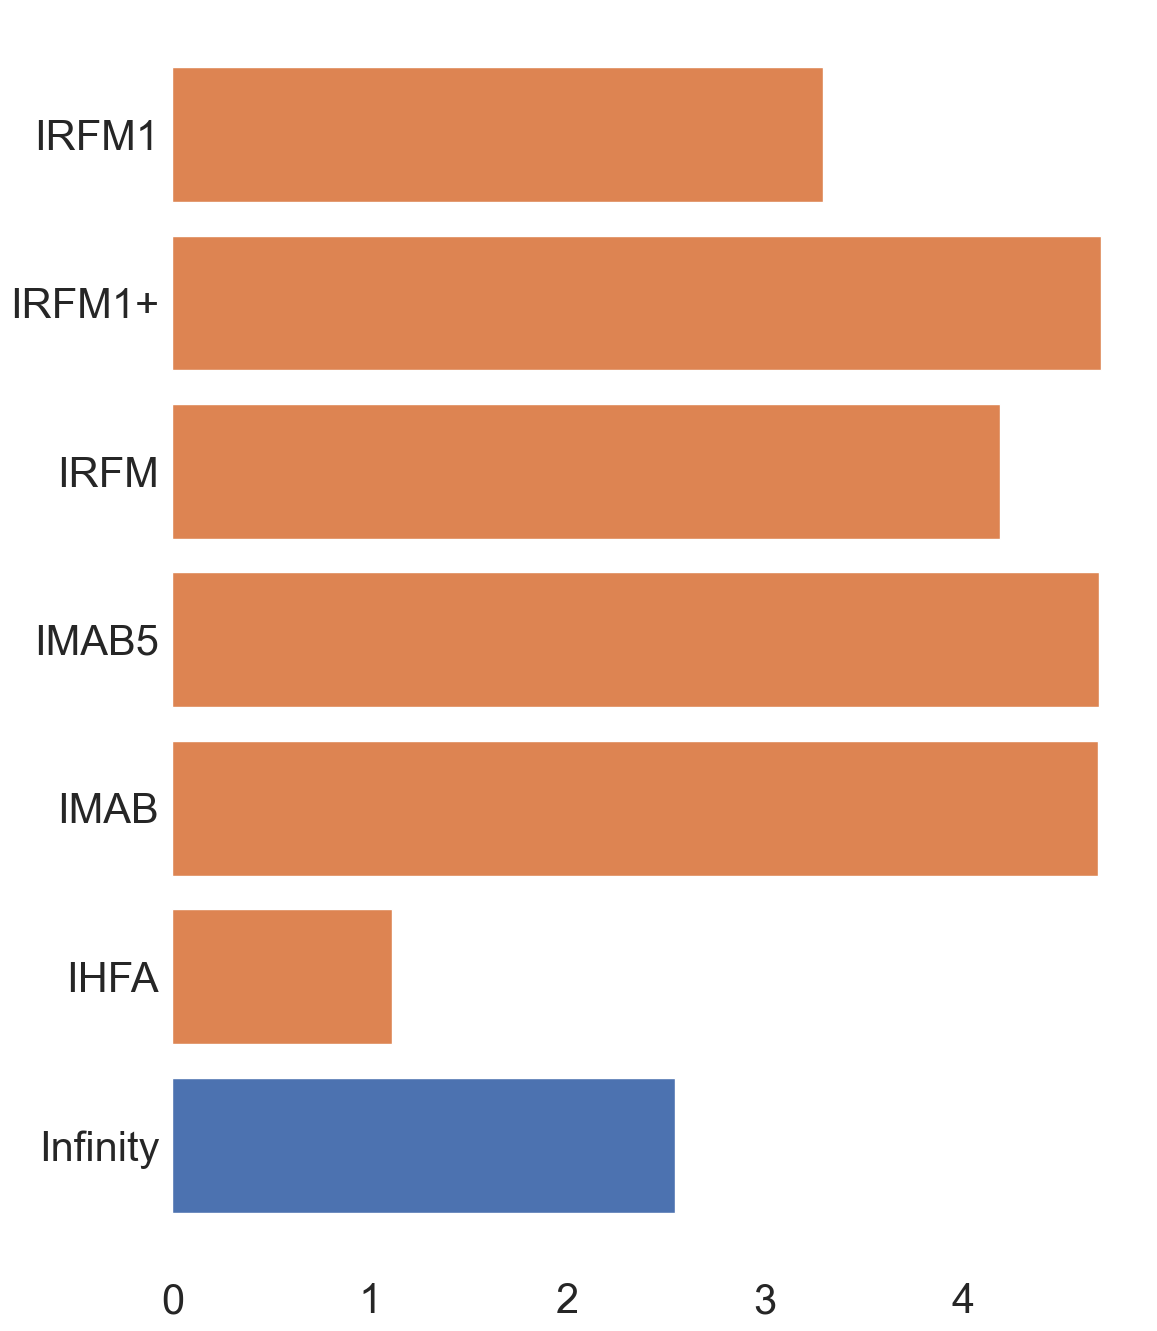

In [37]:
import matplotlib.pyplot as plt

ultima_linha = acumulado_2023.iloc[-1, :]
linha_infinity['nome'] = 'Infinity'

# criando uma nova figura
fig = plt.figure()

fig.subplots_adjust(top=0.95, bottom=0.05, left=0.15)

fig.set_size_inches(13, 14)


# adicionando um subplot à figura
ax = fig.add_subplot(1, 1, 1)

# criando um gráfico de barras com a última coluna
ax.barh(linha_infinity['nome'], linha_infinity['Ret_Acum_Per'])
ax.barh(ultima_linha.index, ultima_linha)

# ajustando as fontes dos eixos
ax.tick_params(axis='both', which='major', labelsize=30)

# removendo os eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('None')


nome_arquivo = '/ima.png'

fig.savefig(caminho_pasta+nome_arquivo)


# exibindo o gráfico
plt.show()

In [38]:
#retorno mensal infinity
df = pd.DataFrame()
df['cotas'] = infinity_fund['cotas_normalizadas']

df.index = pd.to_datetime(df.index)
df['retorno diario'] = df['cotas'].pct_change()
retorno_mensal = pd.DataFrame()
# agrupar por mês e calcular retorno acumulado
retorno_mensal['infinity'] = df['retorno diario'].resample('M').apply(lambda x: (1+x).prod()-1)*100

print(retorno_mensal)

            infinity
DT_COMPTC           
2022-10-31  1.063972
2022-11-30 -0.507181
2022-12-31  0.759347
2023-01-31  1.477168
2023-02-28 -1.357944
2023-03-31  1.530692
2023-04-30  0.898525
2023-05-31  1.024272


In [39]:
#retorno mensal ibov
ibov = yf.download('^BVSP', start='2022-10-01', end=data_fim)['Adj Close']
ibov.index = pd.to_datetime(ibov.index).strftime('%Y-%m-%d')
df = pd.DataFrame()
df['retorno diario'] = ibov.pct_change()
df.index = pd.to_datetime(df.index)
# agrupar por mês e calcular retorno acumulado
retorno_mensal['Ibovespa'] = df['retorno diario'].resample('M').apply(lambda x: (1+x).prod()-1)*100

#print(retorno_mensal)
retorno_mensal

[*********************100%***********************]  1 of 1 completed


,infinity,Ibovespa
DT_COMPTC,,
2022-10-31,1.063972,-0.083524
2022-11-30,-0.507181,-3.060231
2022-12-31,0.759347,-2.182494
2023-01-31,1.477168,3.181831
2023-02-28,-1.357944,-7.574957
2023-03-31,1.530692,-2.906644
2023-04-30,0.898525,1.021770
2023-05-31,1.024272,NaN


In [40]:
codigo_bcb = 12
url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)

cdi = pd.read_json(url)
cdi['data'] = pd.to_datetime(cdi['data'], dayfirst=True)
cdi.set_index('data', inplace=True)
cdi_ts = cdi['2022-10-01' : data_fim]/100

cdi_ts = (1 + cdi_ts).cumprod()
cdi_ts.reset_index(inplace=True)
cdi_ts = cdi_ts.rename(columns={'data': 'Date', 'valor': 'CDI'})
cdi_ts['Date'] = pd.to_datetime(cdi_ts['Date'])
cdi_ts.set_index(['Date'], inplace=True)


df = pd.DataFrame()
df['retorno diario'] = cdi_ts['CDI'].pct_change()
df.index = pd.to_datetime(df.index)
# agrupar por mês e calcular retorno acumulado
retorno_mensal['CDI'] = df['retorno diario'].resample('M').apply(lambda x: (1+x).prod()-1)*100
retorno_mensal


,infinity,Ibovespa,CDI
DT_COMPTC,,,
2022-10-31,1.063972,-0.083524,0.969396
2022-11-30,-0.507181,-3.060231,1.020676
2022-12-31,0.759347,-2.182494,1.123315
2023-01-31,1.477168,3.181831,1.123315
2023-02-28,-1.357944,-7.574957,0.918141
2023-03-31,1.530692,-2.906644,1.174673
2023-04-30,0.898525,1.021770,0.918141
2023-05-31,1.024272,NaN,NaN


In [41]:
retorno_mensal = retorno_mensal.dropna()
retorno_mensal.index = pd.to_datetime(retorno_mensal.index).strftime('%Y-%m')
retorno_mensal



,infinity,Ibovespa,CDI
DT_COMPTC,,,
2022-10,1.063972,-0.083524,0.969396
2022-11,-0.507181,-3.060231,1.020676
2022-12,0.759347,-2.182494,1.123315
2023-01,1.477168,3.181831,1.123315
2023-02,-1.357944,-7.574957,0.918141
2023-03,1.530692,-2.906644,1.174673
2023-04,0.898525,1.021770,0.918141


In [42]:
# cria um dataframe com as datas de jan de 2022 até dez de 2023
novas_datas = pd.date_range(start='2022-01', end='2023-12', freq='MS').strftime('%Y-%m')
dados = pd.concat([retorno_mensal, pd.DataFrame(index=novas_datas)], sort=False)
dados = dados.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
dados = dados.round(2)
dados = dados.sort_index()
dados

,infinity,Ibovespa,CDI
index,,,
2022-01,NaN,NaN,NaN
2022-02,NaN,NaN,NaN
2022-03,NaN,NaN,NaN
2022-04,NaN,NaN,NaN
2022-05,NaN,NaN,NaN
2022-06,NaN,NaN,NaN
2022-07,NaN,NaN,NaN
2022-08,NaN,NaN,NaN
2022-09,NaN,NaN,NaN


In [43]:
ano_2022 = dados.loc['2022-01':'2022-12']
ano_2023 = dados.loc['2023-01':'2023-12']

df_acumulado_2022 = ((1 + ano_2022/100).cumprod() - 1)*100
lista_acum_2022 = []
lista_acum_2022.append(df_acumulado_2022.iloc[-1,0])
lista_acum_2022.append(df_acumulado_2022.iloc[-1,1])
lista_acum_2022.append(df_acumulado_2022.iloc[-1,2])

df_acumulado_2023 = ((1 + ano_2023/100).cumprod() - 1)*100
df_acumulado_2023 = df_acumulado_2023.dropna()
lista_acum_2023 = []
lista_acum_2023.append(df_acumulado_2023.iloc[-1,0])
lista_acum_2023.append(df_acumulado_2023.iloc[-1,1])
lista_acum_2023.append(df_acumulado_2023.iloc[-1,2])



ano_2022 = ano_2022.fillna('-')
ano_2023 = ano_2023.fillna('-')



In [44]:
ano_2022 = ano_2022.transpose()
ano_2023 = ano_2023.transpose()
ano_2023

index,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
infinity,1.48,-1.36,1.53,0.9,-,-,-,-,-,-,-,-
Ibovespa,3.18,-7.57,-2.91,1.02,-,-,-,-,-,-,-,-
CDI,1.12,0.92,1.17,0.92,-,-,-,-,-,-,-,-


In [45]:
ano_0 = hoje.year
ano_1 = int(hoje.year)-1

novos_nomes_ano_0 = {'index': f'{ano_0}',
                    f'{ano_0}-01': 'Jan',
                    f'{ano_0}-02': 'Fev',
                    f'{ano_0}-03': 'Mar',
                    f'{ano_0}-04': 'Abr',
                    f'{ano_0}-05': 'Mai',
                    f'{ano_0}-06': 'Jun',
                    f'{ano_0}-07': 'Jul',
                    f'{ano_0}-08': 'Ago',
                    f'{ano_0}-09': 'Set',
                    f'{ano_0}-10': 'Out',
                    f'{ano_0}-11': 'Nov',
                    f'{ano_0}-12': 'Dez'}

novos_nomes_ano_1 = {'index': f'{ano_1}',
                    f'{ano_1}-01': 'Jan',
                    f'{ano_1}-02': 'Fev',
                    f'{ano_1}-03': 'Mar',
                    f'{ano_1}-04': 'Abr',
                    f'{ano_1}-05': 'Mai',
                    f'{ano_1}-06': 'Jun',
                    f'{ano_1}-07': 'Jul',
                    f'{ano_1}-08': 'Ago',
                    f'{ano_1}-09': 'Set',
                    f'{ano_1}-10': 'Out',
                    f'{ano_1}-11': 'Nov',
                    f'{ano_1}-12': 'Dez'}



ano_2023 = ano_2023.rename(columns = novos_nomes_ano_0)
ano_2023.index.name = f'{ano_0}'

ano_2022 = ano_2022.rename(columns = novos_nomes_ano_1)
ano_2022.index.name = f'{ano_1}'


ano_2022['Acum'] = lista_acum_2022
ano_2023['Acum'] = lista_acum_2023

ano_2022 = ano_2022.round(2)
ano_2023 = ano_2023.round(2)

In [46]:
with pd.ExcelWriter('tabelas/rentabilidade.xlsx') as writer:
    ano_2023.to_excel(writer, sheet_name='Planilha1', startrow=0)
    ano_2022.to_excel(writer, sheet_name='Planilha1', startrow=4)


display(ano_2022,ano_2023)

index,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Acum
2022,,,,,,,,,,,,,
infinity,-,-,-,-,-,-,-,-,-,1.06,-0.51,0.76,1.31
Ibovespa,-,-,-,-,-,-,-,-,-,-0.08,-3.06,-2.18,-5.25
CDI,-,-,-,-,-,-,-,-,-,0.97,1.02,1.12,3.14


index,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Acum
2023,,,,,,,,,,,,,
infinity,1.48,-1.36,1.53,0.9,-,-,-,-,-,-,-,-,2.55
Ibovespa,3.18,-7.57,-2.91,1.02,-,-,-,-,-,-,-,-,-6.46
CDI,1.12,0.92,1.17,0.92,-,-,-,-,-,-,-,-,4.19


Curva DI

In [47]:
data = datetime.datetime.strptime(data_d1, '%Y-%m-%d').date()
d1 = data.strftime('%d/%m/%Y')

data = datetime.datetime.strptime(data_w1, '%Y-%m-%d').date()
w1 = data.strftime('%d/%m/%Y')

data = datetime.datetime.strptime(data_m1, '%Y-%m-%d').date()
m1 = data.strftime('%d/%m/%Y')



In [48]:
curva_d1 = curva_interpolada(d1, hoje)
curva_w1 = curva_interpolada(w1, hoje)
curva_m1 = curva_interpolada(m1, hoje)

[WDM] - Downloading: 100%|██████████| 6.81M/6.81M [00:00<00:00, 13.0MB/s]


In [49]:
curvas = pd.DataFrame()
curvas.index = curva_d1[0]
curvas['d1'] = curva_d1[1]
curvas['w1'] = curva_w1[1]
curvas['m1'] = curva_m1[1]
curvas

,d1,w1,m1
16.000000,13.599258,13.682197,13.691429
18.503504,13.611237,13.684336,13.692230
21.007007,13.622381,13.685957,13.692290
23.510511,13.632701,13.687070,13.691623
26.014014,13.642209,13.687682,13.690243
...,...,...,...
2506.985986,12.259786,12.225524,12.704735
2509.489489,12.261192,12.226278,12.701464
2511.992993,12.262606,12.227034,12.698172
2514.496496,12.264028,12.227793,12.694858


In [50]:
df = curva_interpolada("05/05/2023", hoje)
df[2]

[168, 430, 691, 952, 1212, 1473, 1734, 1995, 2256, 2517]

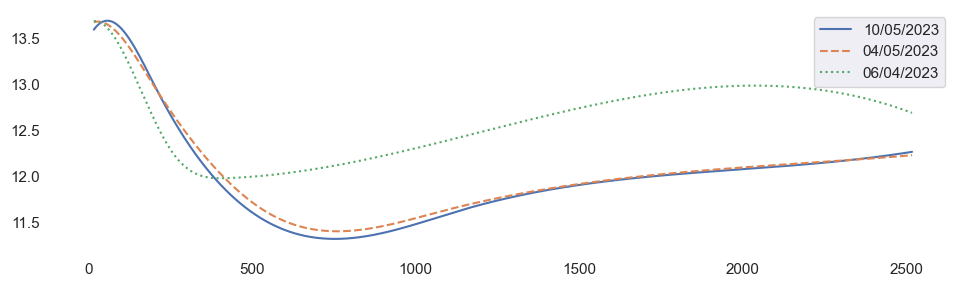

In [51]:
fig = plt.figure()

fig.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95) # diminui o valor de left e right

fig.set_size_inches(10, 3)


plt.plot(curvas.index, curvas['d1'], label=f'{d1}', linewidth = 1.5)
plt.plot(curvas.index, curvas['w1'], label=f'{w1}', linestyle = '--')
plt.plot(curvas.index, curvas['m1'], label=f'{m1}', linestyle = ':')
plt.legend()

ax = plt.gca()
ax.set_facecolor('None') # Define a cor do fundo como branco
ax.grid(False) # Remove o grid


nome_arquivo = '/curva_di.png'

fig.savefig(caminho_pasta+nome_arquivo)

# exibindo o gráfico
plt.show()

In [52]:
import pdfcrowd
import sys

try:
    # create the API client instance
    client = pdfcrowd.HtmlToPdfClient('g4', '028a306af4543109419b7940cfea7bc5')

    
     # remove margins and set height
    client.setPageMargins('0', '0', '0', '0')
    client.setPageHeight("-1")

    #client.setPageDimensions("300mm", "350mm")
    client.convertUrlToFile('https://gmenezess.github.io/Publico/', 'OnePage.pdf')
    
except pdfcrowd.Error as why:
    # report the error
    sys.stderr.write('Pdfcrowd Error: {}\n'.format(why))

    # rethrow or handle the exception
    raise

In [53]:
#!pip install pdfcrowd


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: C:\Users\gahbr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
